# Zillow Rent Index Time Series Data

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\Thomas\\Workspace 2\\price.csv')
df_sqft = pd.read_csv('C:\\Users\\Thomas\\Workspace 2\\pricepersqft.csv')

In [154]:
print(df.shape)
print(df_sqft.shape)
print(df['City'].nunique())
print(df.columns)

(13131, 81)
(11919, 81)
9670
Index(['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank',
       'November 2010', 'December 2010', 'January 2011', 'February 2011',
       'March 2011', 'April 2011', 'May 2011', 'June 2011', 'July 2011',
       'August 2011', 'September 2011', 'October 2011', 'November 2011',
       'December 2011', 'January 2012', 'February 2012', 'March 2012',
       'April 2012', 'May 2012', 'June 2012', 'July 2012', 'August 2012',
       'September 2012', 'October 2012', 'November 2012', 'December 2012',
       'January 2013', 'February 2013', 'March 2013', 'April 2013', 'May 2013',
       'June 2013', 'July 2013', 'August 2013', 'September 2013',
       'October 2013', 'November 2013', 'December 2013', 'January 2014',
       'February 2014', 'March 2014', 'April 2014', 'May 2014', 'June 2014',
       'July 2014', 'August 2014', 'September 2014', 'October 2014',
       'November 2014', 'December 2014', 'January 2015', 'February 2015',
       'March 201

In [155]:
print(df.head())
##print('-----------------------')
##print(df_sqft.head())

   City Code          City         Metro        County State  Population Rank  \
0       6181      New York      New York        Queens    NY                1   
1      12447   Los Angeles   Los Angeles   Los Angeles    CA                2   
2      17426       Chicago       Chicago          Cook    IL                3   
3      39051       Houston       Houston        Harris    TX                4   
4      13271  Philadelphia  Philadelphia  Philadelphia    PA                5   

   November 2010  December 2010  January 2011  February 2011      ...       \
0            NaN            NaN           NaN            NaN      ...        
1         2184.0         2184.0        2183.0         2188.0      ...        
2         1563.0         1555.0        1547.0         1537.0      ...        
3         1198.0         1199.0        1199.0         1200.0      ...        
4         1092.0         1099.0        1094.0         1087.0      ...        

   April 2016  May 2016  June 2016  July 201

C:\workspace\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


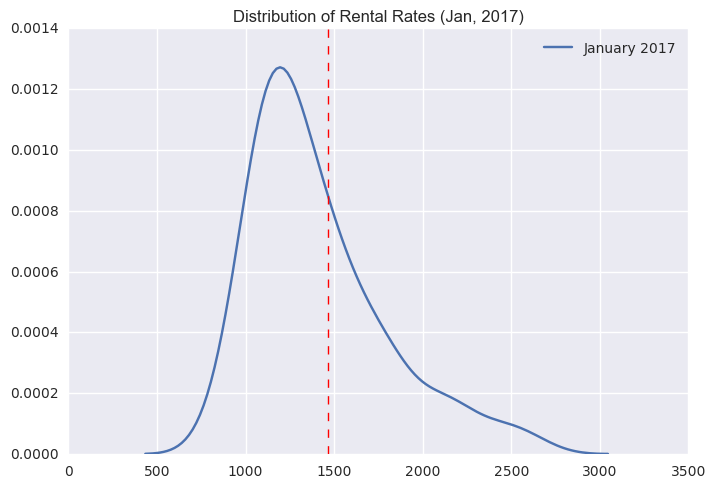

In [156]:
## Quick KDE plot to visualize distribution
kb = df.groupby('State')['January 2017'].mean()
plot = sns.kdeplot(kb)
mn = df['January 2017'].mean()
plt.axvline(mn, color='r', linestyle='dashed', linewidth=1, label='mean')
plt.title('Distribution of Rental Rates (Jan, 2017)')
plt.show()
plt.clf()

## Functions to be used

In [157]:
def createCols(data):
    data['Total Change'] = data.loc[:,'January 2017'] - data.loc[:,'November 2010']
    data['Percent Change'] = 100*(data.loc[:,'January 2017'] - data.loc[:,'November 2010']) / data.loc[:,'November 2010']
    data['Year Change'] = data.loc[:,'January 2017'] - data.loc[:,'January 2016']
    data['Year Percent Change'] = 100*(data.loc[:,'January 2017'] - data.loc[:,'January 2016']) / data.loc[:,'January 2016']
    data['Average (2010-2017)'] = data.loc[:, 'November 2010':'January 2017'].mean(axis=1,skipna=True)
    data['Std (2010-2017)'] = data.loc[:, 'November 2010':'January 2017'].std(axis=1,skipna=True)
    
    return data

In [158]:
def createZs(data, col_list =['Total Change', 'January 2017', 'Average (2010-2017)']):
    for col in col_list:
        nation_mean = df[col].mean()
        nation_std = df[col].std()
        data['{} Zscore'.format(col)] = (data.loc[:,col] - nation_mean) / nation_std
    return data
    

In [159]:
def summarizeArea(data, title):
    print('Mean rent (Nov, 2010) in {}: $'.format(title) + str(round(data['November 2010'].mean(), 2)))
    print('Standard Deviation of rent (Nov, 2010) in {}: $'.format(title) + str(round(data['November 2010'].std(), 3)))
    print('Mean rent (Jan, 2017) in {}: $'.format(title) + str(round(data['January 2017'].mean(), 2)))
    print('Standard Deviation of rent in {} (Jan, 2017): $'.format(title) + str(round(data['January 2017'].std(), 3)))
    print('------------------------------------------------------')
    print('Mean total change in {}: $'.format(title) + str(round(data['Total Change'].mean(),2)))
    print('Standard Deviation of total change in {}: $'.format(title) + str(round(data['Total Change'].std(), 3)))
    print('Mean percent change in {}: '.format(title) + str(round(data['Percent Change'].mean(),3))+'%')
    print('------------------------------------------------------')
    print('Mean 1 year change in {}: $'.format(title) + str(round(data['Year Change'].mean(),2)))
    print('Standard Deviation of 1 year change in {}: $'.format(title) + str(round(data['Year Change'].std(), 3)))
    print('Mean 1 year percent change in {}: '.format(title) + str(round(data['Year Percent Change'].mean(), 3))+'%')
    

In [160]:
def summarizeGroup(data, group, sort='Total Change'):
    print("Top 5 {}'s ordered by {}".format(group, sort))
    print(data.groupby(group)[['Total Change', 'January 2017', 'Average (2010-2017)', 'Std (2010-2017)']]\
          .mean().sort_values(by=sort, ascending=False).head(5))
    print('---------------------------------')
    print("Bottom 5 {}'s ordered by {}".format(group, sort))
    print(data.groupby(group)[['Total Change', 'January 2017', 'Average (2010-2017)', 'Std (2010-2017)']]\
          .mean().sort_values(by=sort, ascending=True).head(5))
    

In [161]:
def summarizeGroupZs(data, group, sort='Total Change Zscore'):
    print("Top 5 {}'s ordered by {}".format(group, sort))
    print(data.groupby(group)[['Total Change Zscore', 'January 2017 Zscore', 'Average (2010-2017) Zscore', 'Std (2010-2017)']]\
          .mean().sort_values(by=sort, ascending=False).head(5))
    print('---------------------------------')
    print("Bottom 5 {}'s ordered by {}".format(group, sort))
    print(data.groupby(group)[['Total Change Zscore', 'January 2017 Zscore', 'Average (2010-2017) Zscore', 'Std (2010-2017)']]\
          .mean().sort_values(by=sort, ascending=True).head(5))

# General Investigation

In [162]:
df = createCols(df)
df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,October 2016,November 2016,December 2016,January 2017,Total Change,Percent Change,Year Change,Year Percent Change,Average (2010-2017),Std (2010-2017)
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2318,2321,2321,2322,NaN,NaN,-13,-0.556745,2089.645161,207.087856
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2731,2740,2748,2753,569.0,26.053114,157,6.047766,2355.293333,193.210064
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1668,1656,1644,1632,69.0,4.414587,-36,-2.158273,1587.386667,74.601807
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1437,1437,1435,1430,232.0,19.365609,-6,-0.417827,1300.546667,99.522548
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1216,1211,1209,1212,120.0,10.989011,16,1.337793,1129.986667,51.131387


## Nationwide

In [163]:
summarizeArea(df, 'US')

Mean rent (Nov, 2010) in US: $1327.1
Standard Deviation of rent (Nov, 2010) in US: $652.531
Mean rent (Jan, 2017) in US: $1467.3
Standard Deviation of rent in US (Jan, 2017): $820.708
------------------------------------------------------
Mean total change in US: $137.95
Standard Deviation of total change in US: $263.985
Mean percent change in US: 9.376%
------------------------------------------------------
Mean 1 year change in US: $17.55
Standard Deviation of 1 year change in US: $94.178
Mean 1 year percent change in US: 1.214%


In [164]:
print('Minimum total change: ' + str(df['Total Change'].min()))
print(df.loc[df['Total Change'].idxmin(),:].head(5))
print('-------------------------------')
print('Maximum total change: ' + str(df['Total Change'].max()))
print(df.loc[df['Total Change'].idxmax(),:].head(5))

Minimum total change: -1367.0
City Code              398547
City         Town of Westerly
Metro              Providence
County             Washington
State                      RI
Name: 2284, dtype: object
-------------------------------
Maximum total change: 5422.0
City Code            30280
City              Atherton
Metro        San Francisco
County           San Mateo
State                   CA
Name: 5151, dtype: object


In [165]:
print('Most expensive median rent as of Jan, 2017')
print()
print(df.loc[df['January 2017'].idxmax(),:].head(5))
print()
print('$'+str(df['January 2017'].max()))

Most expensive median rent as of Jan, 2017

City Code            124901
City         Jupiter Island
Metro        Port St. Lucie
County               Martin
State                    FL
Name: 12234, dtype: object

$17985


In [166]:
print('Least expensive median rent as of Jan, 2017')
print()
print(df.loc[df['January 2017'].idxmin(),:].head(5))
print()
print('$'+str(df['January 2017'].min()))

Least expensive median rent as of Jan, 2017

City Code     166526
City         Beecher
Metro          Flint
County       Genesee
State             MI
Name: 4083, dtype: object

$518


## Remarks on Nationwide Findings

Mean rent (Nov, 2010) in US: `$`1327.1

Mean rent (Jan, 2017) in US: `$`1467.3

Mean total change in US between 2010 and 2017: `$`137.95

Mean percent change in US between 2010 and 2017: 9.376%


- Atherton, CA experienced the greatest increase in median rental rates with a jump of `$`5422.00 per month between 2010 and 2017
- Providence, RI experienced the greatest decrease in median rental rates with a drop of `$`1367.00 per month between 2010 and 2017
- As of January, 2017 Jupiter Island, FL has the highest median rental rates in the country at `$`17985 per month
- As of January 2017 Beecher, Michigan has the lowest median rental rates in the country at `$`518 per month



## By State

In [167]:
summarizeGroup(df, 'State')

Top 5 State's ordered by Total Change
       Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
State                                                                  
OR       408.746988   1486.405405          1254.923186       122.994959
DC       395.000000   2569.000000          2429.413333        90.075208
CO       390.910828   1751.606742          1537.431834       145.697187
CA       388.886179   2408.163978          2105.223695       190.986028
MA       358.000000   2105.573826          1870.123087       151.059451
---------------------------------
Bottom 5 State's ordered by Total Change
       Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
State                                                                  
MI       -32.180693   1125.536542          1064.716326        78.496106
WV       -21.578313    983.767677          1018.528708        56.868203
LA        -7.397590   1205.233766          1226.918010        66.798279
IL        -6.361111   1

In [168]:
summarizeGroupZs(df_z, 'State')

Top 5 State's ordered by Total Change Zscore
       Total Change Zscore  January 2017 Zscore  Average (2010-2017) Zscore  \
State                                                                         
OR                1.025802             0.023283                   -0.174577   
DC                0.973727             1.342382                    1.471326   
CO                0.958237             0.346421                    0.221324   
CA                0.950567             1.146410                    1.017015   
MA                0.833567             0.777716                    0.687550   

       Std (2010-2017)  
State                   
OR          122.994959  
DC           90.075208  
CO          145.697187  
CA          190.986028  
MA          151.059451  
---------------------------------
Bottom 5 State's ordered by Total Change Zscore
       Total Change Zscore  January 2017 Zscore  Average (2010-2017) Zscore  \
State                                                            

In [169]:
summarizeGroup(df, 'State', sort='Average (2010-2017)')

Top 5 State's ordered by Average (2010-2017)
       Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
State                                                                  
DC       395.000000   2569.000000          2429.413333        90.075208
CA       388.886179   2408.163978          2105.223695       190.986028
NJ       168.358696   2146.907609          2034.977271       107.352387
HI       339.296296   2157.296296          1954.977778       143.780971
MA       358.000000   2105.573826          1870.123087       151.059451
---------------------------------
Bottom 5 State's ordered by Average (2010-2017)
       Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
State                                                                  
OK        95.277108    910.069364           887.115275        55.557689
AR       124.531915    951.986395           911.698417        53.406380
ID              NaN   1106.000000           981.057514        74.440319
AL       

In [170]:
summarizeGroupZs(df_z, 'State', sort='Average (2010-2017) Zscore')

Top 5 State's ordered by Average (2010-2017) Zscore
       Total Change Zscore  January 2017 Zscore  Average (2010-2017) Zscore  \
State                                                                         
DC                0.973727             1.342382                    1.471326   
CA                0.950567             1.146410                    1.017015   
NJ                0.115187             0.828079                    0.918573   
HI                0.762716             0.840738                    0.806463   
MA                0.833567             0.777716                    0.687550   

       Std (2010-2017)  
State                   
DC           90.075208  
CA          190.986028  
NJ          107.352387  
HI          143.780971  
MA          151.059451  
---------------------------------
Bottom 5 State's ordered by Average (2010-2017) Zscore
       Total Change Zscore  January 2017 Zscore  Average (2010-2017) Zscore  \
State                                              

## Remarks for State grouping

- The highest total change in average listing when grouped by State occurs in Oregon. Here, average rental rates increased by `$`408.75 (1.026σ's above mean national increase).

- The highest average rental price among the States between 2010 and 2017 is `$`2439.41 (1.471σ's above mean national rate) and is found in Washington, D.C.

- Michigan experienced the greatest drop in mean rental rates at a mean decrease of `$`32.18 (.644σ's below mean national increase).

- Oklahoma has the lowest average rental rates between 2010 and 2017 with a value of `$`887.12 (.69σ's below mean national rate).


## By Metro

In [171]:
summarizeGroup(df, 'Metro')

Top 5 Metro's ordered by Total Change
               Total Change  January 2017  Average (2010-2017)  \
Metro                                                            
San Jose        1230.541667   4381.875000          3729.616667   
San Francisco   1096.728395   4360.012346          3641.319835   
Brunswick        851.600000   3353.800000          2525.410667   
Edwards          824.750000   3697.250000          2994.706667   
Fort Myers       807.900000   2969.900000          2351.640000   

               Std (2010-2017)  
Metro                           
San Jose            515.522666  
San Francisco       529.984476  
Brunswick           391.788491  
Edwards             369.322484  
Fort Myers          334.710523  
---------------------------------
Bottom 5 Metro's ordered by Total Change
            Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
Metro                                                                       
El Centro         -500.2        1182.4 

In [172]:
summarizeGroupZs(df_z, 'Metro')

Top 5 Metro's ordered by Total Change Zscore
               Total Change Zscore  January 2017 Zscore  \
Metro                                                     
San Jose                  4.138842             3.551300   
San Francisco             3.631944             3.524661   
Brunswick                 2.703373             2.298630   
Edwards                   2.601663             2.717111   
Fort Myers                2.537833             1.830863   

               Average (2010-2017) Zscore  Std (2010-2017)  
Metro                                                       
San Jose                         3.293401       515.522666  
San Francisco                    3.169664       529.984476  
Brunswick                        1.605855       391.788491  
Edwards                          2.263515       369.322484  
Fort Myers                       1.362337       334.710523  
---------------------------------
Bottom 5 Metro's ordered by Total Change Zscore
            Total Change Zscore 

In [173]:
summarizeGroup(df, 'Metro', sort='Average (2010-2017)')

Top 5 Metro's ordered by Average (2010-2017)
                Total Change  January 2017  Average (2010-2017)  \
Metro                                                             
San Jose         1230.541667   4381.875000          3729.616667   
San Francisco    1096.728395   4360.012346          3641.319835   
Port St. Lucie    301.000000   2973.076923          3056.201026   
Edwards           824.750000   3697.250000          2994.706667   
Stamford          293.772727   2916.090909          2769.458788   

                Std (2010-2017)  
Metro                            
San Jose             515.522666  
San Francisco        529.984476  
Port St. Lucie       226.562010  
Edwards              369.322484  
Stamford             114.415457  
---------------------------------
Bottom 5 Metro's ordered by Average (2010-2017)
             Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
Metro                                                                        
Coffeyvil

In [174]:
summarizeGroupZs(df_z, 'Metro', sort='Average (2010-2017) Zscore')

Top 5 Metro's ordered by Average (2010-2017) Zscore
                Total Change Zscore  January 2017 Zscore  \
Metro                                                      
San Jose                   4.138842             3.551300   
San Francisco              3.631944             3.524661   
Port St. Lucie             0.617645             1.834734   
Edwards                    2.601663             2.717111   
Stamford                   0.590268             1.765299   

                Average (2010-2017) Zscore  Std (2010-2017)  
Metro                                                        
San Jose                          3.293401       515.522666  
San Francisco                     3.169664       529.984476  
Port St. Lucie                    2.349692       226.562010  
Edwards                           2.263515       369.322484  
Stamford                          1.947858       114.415457  
---------------------------------
Bottom 5 Metro's ordered by Average (2010-2017) Zscore
    

## Remarks for Metropolitan Areas

- The highest median rent and highest increase in median rent when grouped by Metropolitan area is San Jose, CA with a mean increase in the median rental price of `$`1,230.54 (4.14σ's above mean national change) between 2010 and 2017. Currently, San Jose has a mean rental price of `$`4,381.88 (3.551σ's above national average). San Francisco is second in terms of these metrics giving credence to the idea that the Bay Area's rent/housing issue is unparalleled.

- The greatest decrease in median rent between 2010 and 2017 was experienced in El Centro, CA. During this time El Centro's median rental rate decreased `$`500.2 on average (-2.417σ's below mean national change) to `$`1182.40. 

- CoffeyVille, KS is the cheapest Metropolitan area to rent in with an average monthly rate of `$`686.64 (-0.971σ's below national average)


# Investigation of Oregon

In [175]:
df_or = df.loc[df['State'] == 'OR']
##df_or.head()
summarizeArea(df_or, 'Oregon')

Mean rent (Nov, 2010) in Oregon: $1084.62
Standard Deviation of rent (Nov, 2010) in Oregon: $213.919
Mean rent (Jan, 2017) in Oregon: $1486.41
Standard Deviation of rent in Oregon (Jan, 2017): $376.303
------------------------------------------------------
Mean total change in Oregon: $408.75
Standard Deviation of total change in Oregon: $197.289
Mean percent change in Oregon: 36.389%
------------------------------------------------------
Mean 1 year change in Oregon: $93.91
Standard Deviation of 1 year change in Oregon: $46.121
Mean 1 year percent change in Oregon: 7.221%


In [176]:
## df_me = df.loc[df['State'] == 'ME']
## df_me.head()

In [177]:
df_or = createZs(df_or, ['Total Change', 'January 2017', 'Average (2010-2017)'])
summarizeGroupZs(df_or, 'County', sort='Average (2010-2017) Zscore' )

Top 5 County's ordered by Average (2010-2017) Zscore
            Total Change Zscore  January 2017 Zscore  \
County                                                 
Clackamas              1.964233             0.591970   
Washington             1.745237             0.610146   
Hood River             1.288139             0.345682   
Clatsop                     NaN             0.207792   
Benton                      NaN             0.108488   

            Average (2010-2017) Zscore  Std (2010-2017)  
County                                                   
Clackamas                     0.357906       184.612069  
Washington                    0.344534       187.549084  
Hood River                    0.093315       144.521747  
Clatsop                       0.052759       134.737198  
Benton                        0.045547        85.900292  
---------------------------------
Bottom 5 County's ordered by Average (2010-2017) Zscore
         Total Change Zscore  January 2017 Zscore  Average

C:\workspace\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [178]:
summarizeGroup(df_or, 'County', sort='Average (2010-2017)')

Top 5 County's ordered by Average (2010-2017)
            Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
County                                                                      
Clackamas     656.478261   1953.130435          1634.894493       184.612069
Washington    598.666667   1968.047619          1625.352381       187.549084
Hood River    478.000000   1751.000000          1446.086667       144.521747
Clatsop              NaN   1637.833333          1417.146552       134.737198
Benton               NaN   1556.333333          1412.000000        85.900292
---------------------------------
Bottom 5 County's ordered by Average (2010-2017)
         Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
County                                                                   
Klamath     52.800000    891.200000           813.941333        42.365881
Douglas    101.230769    955.153846           871.995897        32.303873
Lake       283.000000   1094.000000 

In [179]:
summarizeGroup(df_or, 'County')

Top 5 County's ordered by Total Change
            Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
County                                                                      
Clackamas     656.478261   1953.130435          1634.894493       184.612069
Washington    598.666667   1968.047619          1625.352381       187.549084
Deschutes     588.250000   1581.250000          1242.383333       220.283666
Marion        485.000000   1505.200000          1229.475556       141.125595
Hood River    478.000000   1751.000000          1446.086667       144.521747
---------------------------------
Bottom 5 County's ordered by Total Change
           Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
County                                                                     
Klamath       52.800000    891.200000           813.941333        42.365881
Douglas      101.230769    955.153846           871.995897        32.303873
Umatilla     205.000000   1137.285714     

In [180]:
summarizeGroupZs(df_or, 'County')

Top 5 County's ordered by Total Change Zscore
            Total Change Zscore  January 2017 Zscore  \
County                                                 
Clackamas              1.964233             0.591970   
Washington             1.745237             0.610146   
Deschutes              1.705777             0.138848   
Marion                 1.314656             0.046184   
Hood River             1.288139             0.345682   

            Average (2010-2017) Zscore  Std (2010-2017)  
County                                                   
Clackamas                     0.357906       184.612069  
Washington                    0.344534       187.549084  
Deschutes                    -0.192150       220.283666  
Marion                       -0.210238       141.125595  
Hood River                    0.093315       144.521747  
---------------------------------
Bottom 5 County's ordered by Total Change Zscore
           Total Change Zscore  January 2017 Zscore  \
County           

In [181]:
df_portland = df.loc[(df['Metro'] == 'Portland') & (df['State'] == 'OR')]
summarizeArea(df_portland, 'Portland, OR')


Mean rent (Nov, 2010) in Portland, OR: $1263.84
Standard Deviation of rent (Nov, 2010) in Portland, OR: $199.865
Mean rent (Jan, 2017) in Portland, OR: $1828.78
Standard Deviation of rent in Portland, OR (Jan, 2017): $337.622
------------------------------------------------------
Mean total change in Portland, OR: $564.94
Standard Deviation of total change in Portland, OR: $160.482
Mean percent change in Portland, OR: 44.34%
------------------------------------------------------
Mean 1 year change in Portland, OR: $104.3
Standard Deviation of 1 year change in Portland, OR: $42.049
Mean 1 year percent change in Portland, OR: 6.394%


In [182]:
df_portland = createZs(df_portland, ['Total Change', 'January 2017', 'Average (2010-2017)'])
summarizeGroupZs(df_portland, 'County', sort='Average (2010-2017) Zscore' )

Top 5 County's ordered by Average (2010-2017) Zscore
            Total Change Zscore  January 2017 Zscore  \
County                                                 
Clackamas              1.964233             0.591970   
Washington             1.745237             0.610146   
Multnomah              1.278290             0.310834   
Yamhill                0.997402            -0.026254   
Columbia               0.950367            -0.004017   

            Average (2010-2017) Zscore  Std (2010-2017)  
County                                                   
Clackamas                     0.357906       184.612069  
Washington                    0.344534       187.549084  
Multnomah                     0.033428       165.749165  
Yamhill                      -0.242340       107.842603  
Columbia                     -0.285072       117.799338  
---------------------------------
Bottom 5 County's ordered by Average (2010-2017) Zscore
            Total Change Zscore  January 2017 Zscore  \
Co

C:\workspace\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [183]:
print('Top 10 most expensive cities in Oregon')
print(df_or.sort_values(by='January 2017', ascending=False)[['City', 'January 2017']].head(10))

Top 10 most expensive cities in Oregon
                   City  January 2017
5584      Raleigh Hills          2884
3165         Cedar Mill          2630
1162        Lake Oswego          2570
2265       Happy Valley          2455
1942          West Linn          2445
5239  West Haven-Sylvan          2356
5735         West Slope          2321
3280        Wilsonville          2288
5454           Damascus          2262
6104          Clackamas          2131


In [184]:
print('Highest price increases (Jan, 2016 vs Jan, 2017) in Oregon')
print()
print(df_or.sort_values(by='Year Change', ascending=False)[['City', 'Year Change', 'January 2017', 'Total Change']].head(10))

Highest price increases (Jan, 2016 vs Jan, 2017) in Oregon

                City  Year Change  January 2017  Total Change
1694         Newberg          234          1695         498.0
6923          Dundee          218          1682         400.0
4454       Scappoose          184          1638         453.0
7641          Bandon          182          1354         355.0
11931  Columbia City          176          1647         383.0
10655          Glide          172          1062         130.0
12314    Millersburg          172          1617         419.0
5800        Coquille          171          1151         315.0
9316          Madras          169          1143         340.0
4468       Cornelius          169          1646         484.0


In [185]:
print('Highest Average price (Nov, 2010 to Jan, 2017) in Oregon')
print()
print(df_or.sort_values(by='Average (2010-2017)', ascending=False)[['City', 'Average (2010-2017)', 'January 2017']].head(10))

Highest Average price (Nov, 2010 to Jan, 2017) in Oregon

                   City  Average (2010-2017)  January 2017
5584      Raleigh Hills          2394.093333          2884
3165         Cedar Mill          2198.186667          2630
1162        Lake Oswego          2156.146667          2570
2265       Happy Valley          2045.813333          2455
1942          West Linn          2018.986667          2445
5239  West Haven-Sylvan          1930.893333          2356
3280        Wilsonville          1876.253333          2288
5735         West Slope          1848.066667          2321
5454           Damascus          1833.626667          2262
6104          Clackamas          1759.906667          2131


In [186]:
summarizeGroup(df_or, 'City')

Top 5 City's ordered by Total Change
              Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
City                                                                          
Happy Valley         938.0          2455          2045.813333       256.615639
Cedar Mill           917.0          2630          2198.186667       293.578006
West Linn            911.0          2445          2018.986667       254.120715
Damascus             888.0          2262          1833.626667       216.821933
West Slope           870.0          2321          1848.066667       270.727265
---------------------------------
Bottom 5 City's ordered by Total Change
             Total Change  January 2017  Average (2010-2017)  Std (2010-2017)
City                                                                         
Malin                 8.0           853           812.280000        42.027841
Crescent             11.0           811           762.146667        41.375568
Bonanza              34.

In [187]:
summarizeGroupZs(df_or, 'City')

Top 5 City's ordered by Total Change Zscore
              Total Change Zscore  January 2017 Zscore  \
City                                                     
Happy Valley             3.030665             1.203478   
Cedar Mill               2.951115             1.416709   
West Linn                2.928387             1.191293   
Damascus                 2.841260             0.968315   
West Slope               2.773074             1.040204   

              Average (2010-2017) Zscore  Std (2010-2017)  
City                                                       
Happy Valley                    0.933758       256.615639  
Cedar Mill                      1.147291       293.578006  
West Linn                       0.896164       254.120715  
Damascus                        0.636405       216.821933  
West Slope                      0.656641       270.727265  
---------------------------------
Bottom 5 City's ordered by Total Change Zscore
             Total Change Zscore  January 2017 Z

# Remarks for Oregon
Mean rent (Jan, 2017) in Oregon: `$`1486.41

Mean total change in rental rates in Oregon between 2010 and 2017: `$`408.75

Mean percent change in rental rates in Oregon between 2010 and 2017: 36.389%

Mean 1 year percent change rental rates in Oregon (2016-2017): 7.221%

## County level

- Clackamas County experienced the greatest growth in average rental rate between 2010 and 2017 with an increase of `$`656.48 (1.964σ's above mean national increase). Additionally, Clackamas County had the highest average rental rate between 2010 and 2017 at a rate of `$`1634.89 (0.3579σ's above mean national rate).

- Klamath County experienced the slowest growth in average rental rate between 2010 and 2017 with an increase of `$`52.80 (.323σ's below mean national increase). Additionally, Klamath County had the lowest average rental rate during the period at a rate of `$`813.94 (0.793σ's below mean national rate) 


## City level

- Happy Valley experienced the greatest growth in average rental rates with an increase of `$`938.00 (3.03σ's above mean national increase).

- Malin experienced the least amount of growth in average rental rates with an increase of only `$`8 (.49σ's below mean national increase) 

In [188]:

array = {-1, 0, 1, 3, 5, 4, 5, 2, 1}

def Max(array):
    index = 0
    max_val = array[0]
    for i in range(len(array)-1):
        if array[i] > max_val:
            max_val = array[i]
            index = i
    return index

In [190]:

array = (-1, 0, 1, 3, 5, 4, 5, 2, 1)

def Max(array):
    index = 0
    max_val = array[0]
    for i in range(len(array)-1):
        if array[i] > max_val:
            max_val = array[i]
            index = i
    return index
Max(array)

4